In [5]:
from pathlib import Path
import os
from dotenv import load_dotenv

load_dotenv()

DB_PATH = Path(str(os.getenv('DB_PATH')))

import geopandas as gpd
import pandas as pd

document_files = pd.read_parquet(DB_PATH / "document_files.parquet")
locations = gpd.read_parquet(DB_PATH / "locations.parquet")
project_total_scopes = pd.read_parquet(DB_PATH / "project_total_scopes.parquet")
project_safety_scopes = pd.read_parquet(DB_PATH / "project_safety_scopes.parquet")
project_geos = gpd.read_parquet(DB_PATH / "project_geos.parquet")
projects = pd.read_parquet(DB_PATH / "projects.parquet")
location_year_files = pd.read_parquet(DB_PATH / "location_year_files.parquet")
document_collections = pd.read_parquet(DB_PATH / "document_collections.parquet")
location_to_project = pd.read_parquet(DB_PATH / "_location_to_project.parquet")
location_to_document_collection = pd.read_parquet(DB_PATH / "_location_to_document_collection.parquet")
imgs_to_filesAPI = pd.read_parquet(DB_PATH / '_imgs_to_filesAPI.parquet')
docs_to_filesAPI = pd.read_parquet(DB_PATH / '_docs_to_filesAPI.parquet')
image_pairs = pd.read_parquet(DB_PATH / 'processed' / 'image_pairs.parquet')


In [61]:
locations[locations['location_id'] == 9046811] .merge(
    location_to_project,
    on = 'location_id'
).merge(
    projects,
    on='citydata_proj_id'
).drop_duplicates(subset='citydata_proj_id')[['ProjTitle', 'LeadAgency','proj_year','safety_scope']].rename(columns={'citydata_proj_id':'proj_id', 'location_id':'loc_id', 'proj_year': 'year', 'LeadAgency':'agency'}).explode('safety_scope')
    

,ProjTitle,agency,year,safety_scope
0,Tillary & Adams Street Reconstruction - Brookl...,DOT,2017.0,New or Expanded Median/Pedestrian Refuge Island
0,Tillary & Adams Street Reconstruction - Brookl...,DOT,2017.0,Raised Median
0,Tillary & Adams Street Reconstruction - Brookl...,DOT,2017.0,Median Tip Extension
0,Tillary & Adams Street Reconstruction - Brookl...,DOT,2017.0,Curb Extensions
0,Tillary & Adams Street Reconstruction - Brookl...,DOT,2017.0,Bike/GW Enhancement
7,RECON: TILLARY STREET,DOT,2015.0,New or Expanded Median/Pedestrian Refuge Island
7,RECON: TILLARY STREET,DOT,2015.0,Raised Median
7,RECON: TILLARY STREET,DOT,2015.0,Median Tip Extension
7,RECON: TILLARY STREET,DOT,2015.0,Curb Extensions
7,RECON: TILLARY STREET,DOT,2015.0,Bike/GW Enhancement


In [13]:
#queries123_sample = pd.read_parquet(DB_PATH / 'groundtruth' / 'change_identifier_classes.parquet')
#queries123_sample

image_pairs_sample = pd.read_csv('../data_oai_files/samples/image_pairs.csv')
sample_location_ids = image_pairs_sample['item_id'].str.split('-',expand=True).astype(int)
#sample_location_ids

INDEX_COLS = ['location_id','year_start','year_end']

sample_combos = (
    image_pairs_sample['item_id']
    .str.split('-', expand=True)
    .set_axis(INDEX_COLS, axis=1)
)
sample_combos['location_id'] = sample_combos['location_id'].astype(int)

In [16]:
image_pairs.drop_duplicates(subset='location_id')
image_pairs.set_index('location_id').loc[sample_location_ids[0]]

,year_start,year_end,imagery_path_start,imagery_path_end,uri_start,file_name_start,uri_end,file_name_end
location_id,,,,,,,,
53658,2006,2024,runtime/universes/neurips/imagery/2006/53658.png,runtime/universes/neurips/imagery/2024/53658.png,https://generativelanguage.googleapis.com/v1be...,files/s7oob87xen33,https://generativelanguage.googleapis.com/v1be...,files/7w8i1jshbwey
53658,2006,2012,runtime/universes/neurips/imagery/2006/53658.png,runtime/universes/neurips/imagery/2012/53658.png,https://generativelanguage.googleapis.com/v1be...,files/s7oob87xen33,https://generativelanguage.googleapis.com/v1be...,files/q1c03ytmsmcd
53658,2006,2014,runtime/universes/neurips/imagery/2006/53658.png,runtime/universes/neurips/imagery/2014/53658.png,https://generativelanguage.googleapis.com/v1be...,files/s7oob87xen33,https://generativelanguage.googleapis.com/v1be...,files/yj6hwe3ct1og
53658,2006,2018,runtime/universes/neurips/imagery/2006/53658.png,runtime/universes/neurips/imagery/2018/53658.png,https://generativelanguage.googleapis.com/v1be...,files/s7oob87xen33,https://generativelanguage.googleapis.com/v1be...,files/3te85yss6qlo
53658,2012,2024,runtime/universes/neurips/imagery/2012/53658.png,runtime/universes/neurips/imagery/2024/53658.png,https://generativelanguage.googleapis.com/v1be...,files/q1c03ytmsmcd,https://generativelanguage.googleapis.com/v1be...,files/7w8i1jshbwey
...,...,...,...,...,...,...,...,...
9046811,2012,2014,runtime/universes/neurips/imagery/2012/9046811...,runtime/universes/neurips/imagery/2014/9046811...,https://generativelanguage.googleapis.com/v1be...,files/rf5v4yp6474n,https://generativelanguage.googleapis.com/v1be...,files/mg78oz7rmq4z
9046811,2012,2018,runtime/universes/neurips/imagery/2012/9046811...,runtime/universes/neurips/imagery/2018/9046811...,https://generativelanguage.googleapis.com/v1be...,files/rf5v4yp6474n,https://generativelanguage.googleapis.com/v1be...,files/3ifqz268xhdp
9046811,2014,2024,runtime/universes/neurips/imagery/2014/9046811...,runtime/universes/neurips/imagery/2024/9046811...,https://generativelanguage.googleapis.com/v1be...,files/mg78oz7rmq4z,https://generativelanguage.googleapis.com/v1be...,files/og6uuolc45mf


# Image Change Identifier

In [3]:
from st_preprocessing.config import DATA_PATH
from streettransformer.llms.queries import QUERIES

queries123_sample = pd.read_parquet(DB_PATH / 'groundtruth' / 'change_identifier_classes.parquet')

queries123_sample_deduped = queries123_sample.drop_duplicates(subset=['location_id','year_start','year_end'])
queries123_sample.drop_duplicates()#['#subset=['location_id','year_start','year_end', ])

top1000_merged = (
    queries123_sample_deduped
    .drop_duplicates(subset=INDEX_COLS)
).merge(
    sample_combos,
    on=INDEX_COLS,
    how='inner'
)


top1000_merged_to_export = top1000_merged.merge(
    image_pairs, 
    left_on=INDEX_COLS, right_on=INDEX_COLS,
    how='left', indicator=True
)

top1000_merged_to_export['_merge'].value_counts() # Good: all 1000
# with open('../data_oai_files/samples/image_pairs.csv', 'w') as f:
#     f.write('item_id,file_labels\n')
#     for row in top1000_merged_to_export.itertuples():
#         key         = f'"{row.location_id}-{row.year_start}-{row.year_end}"'
#         file_labels = f'"before:{row.imagery_path_start};after:{row.imagery_path_end}"'
#         f.write(f'{key},{file_labels}\n')

# # # image_pairs_oai_export = pd.DataFrame()
# # # del image_pairs_oai_export
# # # #image_pairs['imagery_path_start']

_merge
both          1000
left_only        0
right_only       0
Name: count, dtype: int64

## And again for SidebySides

In [6]:
top1000_merged_to_export['_merge'].value_counts() # Good: all 1000
with open('../data_oai_files/samples/sidebyside_pairs.csv', 'w') as f:
    f.write('item_id,file_labels\n')
    for row in top1000_merged_to_export.itertuples():
        sbs_start_path = Path(*Path(row.imagery_path_start).parts[0:3]) / 'sidebyside' / Path(row.imagery_path_start).parts[-2] / f'sidebside_{Path(row.imagery_path_start).parts[-1]}'
        sbs_end_path = Path(*Path(row.imagery_path_end).parts[0:3]) / 'sidebyside' / Path(row.imagery_path_end).parts[-2] / f'sidebside_{Path(row.imagery_path_end).parts[-1]}'
        
        key              = f'{row.location_id}-{row.year_start}-{row.year_end}'
        file_labels = f'"before:{sbs_start_path};after:{sbs_end_path}"'
        f.write(f'"{key}",{file_labels}\n')

# Imagery Dater

In [41]:
# Get location_ids from queries123_sample
#query_lids = queries123_sample_deduped['location_id'].unique()
#print(len(query_lids)) # 1015
#locations_sample = locations.set_index('location_id').loc[query_lids].reset_index()

#locations_sample.to_parquet(DB_PATH / 'samples' / 'locations_sample.parquet')
locations_sample = pd.read_parquet(DB_PATH / 'samples' / 'locations_sample.parquet')
locations_sample_500 = locations_sample.sample(n=500).reset_index(drop=True)

sample_grouped_image_paths = locations_sample_500.merge(
    location_year_files,
    on='location_id'
).sort_values('year').groupby('location_id').apply(lambda x: dict(zip(x['year'], x['imagery_path']))).reset_index('location_id').rename(columns={0:'image_paths'})
sample_grouped_image_paths.to_parquet(DB_PATH / 'samples' / 'sample_dater.parquet')
sample_dater = sample_grouped_image_paths

/var/folders/t8/dm9l8xy95mv0d_75b2m8r5nw0000gn/T/ipykernel_78278/3237898926.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).sort_values('year').groupby('location_id').apply(lambda x: dict(zip(x['year'], x['imagery_path']))).reset_index('location_id').rename(columns={0:'image_paths'})


In [44]:
from typing import Callable
# def write_oai_file(df:pd.DataFrame, key:Callable, file_labels:Callable, outpath: Path):
DATA_OAI_PATH = Path('../data_oai_files/')

with open(DATA_OAI_PATH / 'samples' / 'image_dater.csv', 'w') as f:
    f.write('item_id,file_labels\n')
    for row in sample_dater.sample(frac=1).itertuples():
        img_paths        = row.image_paths
        key              = f'"{row.location_id}"'

        file_labels_list = [f'{str(k)}:{v}' for k, v in img_paths.items()]
        file_labels      = ';'.join(file_labels_list)
        f.write(f'{key},"{file_labels}"\n')
    

In [45]:
# Do the same thing for sidebysides
sample_sidebyside_dater = locations_sample_500.merge(
    location_year_files,
    on='location_id'
).sort_values('year').groupby('location_id').apply(lambda x: dict(zip(x['year'], x['sidebyside_path']))).reset_index('location_id').rename(columns={0:'sidebyside_paths'})
sample_sidebyside_dater.to_parquet(DB_PATH / 'sample_sidebyside_dater.parquet')

DATA_OAI_PATH = Path('../data_oai_files/')

with open(DATA_OAI_PATH / 'samples' / 'sidebyside_dater.csv', 'w') as f:
    f.write('item_id,file_labels\n')
    for row in sample_sidebyside_dater.sample(frac=1).itertuples():
        # Need to fix sbs_paths
        sbs_paths = {k: Path(*Path(v).parts[:5]) / f'sidebside_{Path(v).parts[-1]}' for k, v in row.sidebyside_paths.items()}
        key              = f'"{row.location_id}"'

        file_labels_list = [f'{str(k)}:{v}' for k, v in sbs_paths.items()]
        file_labels      = ';'.join(file_labels_list)
        f.write(f'{key},"{file_labels}"\n')

/var/folders/t8/dm9l8xy95mv0d_75b2m8r5nw0000gn/T/ipykernel_78278/4044993931.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).sort_values('year').groupby('location_id').apply(lambda x: dict(zip(x['year'], x['sidebyside_path']))).reset_index('location_id').rename(columns={0:'sidebyside_paths'})


# Summarizers

In [6]:
location_pairs_to_documents = pd.read_parquet(DB_PATH / 'samples' / 'locations_to_documents.parquet')

with open('../data_oai_files/samples/image_describers.csv', 'w') as f:
    f.write('item_id,file_labels\n')
    for row in location_pairs_to_documents.itertuples():
        key         = f'"{row.location_id}-{row.year_start}-{row.year_end}-{row.document_collection_id}-{row.document_file_id}"'
        file_labels = f'"before:{row.imagery_path_start};after:{row.imagery_path_end}"'
        f.write(f'{key},{file_labels}\n')


## And for SidebySide

In [7]:
with open('../data_oai_files/samples/sidebyside_describers.csv', 'w') as f:
    f.write('item_id,file_labels\n')
    for row in location_pairs_to_documents.itertuples():
        sbs_start_path = Path(*Path(row.imagery_path_start).parts[0:3]) / 'sidebyside' / Path(row.imagery_path_start).parts[-2] / f'sidebside_{Path(row.imagery_path_start).parts[-1]}'
        sbs_end_path = Path(*Path(row.imagery_path_end).parts[0:3]) / 'sidebyside' / Path(row.imagery_path_end).parts[-2] / f'sidebside_{Path(row.imagery_path_end).parts[-1]}'
        
        key         = f'"{row.location_id}-{row.year_start}-{row.year_end}-{row.document_collection_id}-{row.document_file_id}"'
        file_labels = f'"before:{sbs_start_path};after:{sbs_end_path}"'
        f.write(f'"{key}",{file_labels}\n')

## And for Documents

In [18]:
from st_preprocessing.config import DATA_PATH

with open('../data_oai_files/samples/document_describers.csv', 'w') as f:
    f.write('item_id,file_labels\n')
    for row in location_pairs_to_documents.itertuples():
        if (DATA_PATH / str(row.document_path)).exists():
            key         = f'"{row.location_id}-{row.year_start}-{row.year_end}-{row.document_collection_id}-{row.document_file_id}"'
            file_labels = f'"document:{row.document_path}"'
            f.write(f'"{key}",{file_labels}\n')

# Linkers

In [20]:
# for each row in location_pairs_to_documents, add either two random documents or two random location_ids.

,location_id,year_start,year_end,document_collection_id,document_file_id,document_collection_name,document_path,borough,sample_source,crossstreets,document_year,subgroup,imagery_path_start,sidebyside_path_start,imagery_path_end,sidebyside_path_end
0,80188,2012,2018,325,453,"Jay Street, Schermerhorn Street to Sands Stree...","raw/documents/325--Jay Street, Schermerhorn St...",Brooklyn,Safety,"[JAY ST, TILLARY ST, 8 AVENUE LINE]",2016,2012_to_2016,runtime/universes/neurips/imagery/2012/80188.png,runtime/universes/neurips/sidebyside/2012/8018...,runtime/universes/neurips/imagery/2018/80188.png,runtime/universes/neurips/sidebyside/2018/8018...
1,49204,2012,2018,207,291,Norwood Neighborhood Slow Zone,raw/documents/207--Norwood Neighborhood Slow Z...,Bronx,noSafety,"[PUTNAM PL, E GUN HILL RD]",2014,2012_to_2016,runtime/universes/neurips/imagery/2012/49204.png,runtime/universes/neurips/sidebyside/2012/4920...,runtime/universes/neurips/imagery/2018/49204.png,runtime/universes/neurips/sidebyside/2018/4920...
2,89213,2018,2024,559,827,Atlantic Avenue Great Streets,raw/documents/559--Atlantic Avenue Great Stree...,Brooklyn,Safety,"[ATLANTIC AVE, GEORGIA AVE]",2020,2018_to_2022,runtime/universes/neurips/imagery/2018/89213.png,runtime/universes/neurips/sidebyside/2018/8921...,runtime/universes/neurips/imagery/2024/89213.png,runtime/universes/neurips/sidebyside/2024/8921...
3,9035904,2006,2012,64,89,Livingston Street Bus Lanes,raw/documents/64--Livingston Street Bus Lanes/...,Brooklyn,noSafety,[FLATBUSH AVE EXTENSION],2010,2007_to_2010,runtime/universes/neurips/imagery/2006/9035904...,runtime/universes/neurips/sidebyside/2006/9035...,runtime/universes/neurips/imagery/2012/9035904...,runtime/universes/neurips/sidebyside/2012/9035...
4,9052021,2006,2012,29,39,Chatham Square/Park Row Improvement Program,raw/documents/29--Chatham Square/Park Row Impr...,Manhattan,noSafety,"[2 AVENUE LINE, PARK ROW]",2008,2007_to_2010,runtime/universes/neurips/imagery/2006/9052021...,runtime/universes/neurips/sidebyside/2006/9052...,runtime/universes/neurips/imagery/2012/9052021...,runtime/universes/neurips/sidebyside/2012/9052...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,23905,2018,2024,628,1018,"Riverside Drive, 116th Street to 135th Street","raw/documents/628--Riverside Drive, 116th Stre...",Manhattan,Safety,"[RIVERSIDE DR, W 116 ST]",2021,2018_to_2022,runtime/universes/neurips/imagery/2018/23905.png,runtime/universes/neurips/sidebyside/2018/2390...,runtime/universes/neurips/imagery/2024/23905.png,runtime/universes/neurips/sidebyside/2024/2390...
321,15844,2018,2024,571,869,"Smith Street, State Street to Fulton Street – ...","raw/documents/571--Smith Street, State Street ...",Brooklyn,noSafety,"[FULTON ST, SMITH ST, JAY ST, EASTERN PARKWAY ...",2020,2018_to_2022,runtime/universes/neurips/imagery/2018/15844.png,runtime/universes/neurips/sidebyside/2018/1584...,runtime/universes/neurips/imagery/2024/15844.png,runtime/universes/neurips/sidebyside/2024/1584...
322,80064,2018,2024,571,869,"Smith Street, State Street to Fulton Street – ...","raw/documents/571--Smith Street, State Street ...",Brooklyn,Safety,"[JOHNSON ST, ADAMS ST]",2020,2018_to_2022,runtime/universes/neurips/imagery/2018/80064.png,runtime/universes/neurips/sidebyside/2018/8006...,runtime/universes/neurips/imagery/2024/80064.png,runtime/universes/neurips/sidebyside/2024/8006...
323,80244,2018,2024,559,828,Atlantic Avenue Great Streets,raw/documents/559--Atlantic Avenue Great Stree...,Brooklyn,Safety,"[VAN SICLEN AVE, ATLANTIC AVE, LIRR ATLANTIC L...",2020,2018_to_2022,runtime/universes/neurips/imagery/2018/80244.png,runtime/universes/neurips/sidebyside/2018/8024...,runtime/universes/neurips/imagery/2024/80244.png,runtime/universes/neurips/sidebyside/2024/8024...


## Image to Documents
Add two random documents

In [144]:
docs_wrong_answers = {}
location_pairs_to_documents['key'] = f'"{row.location_id}-{row.year_start}-{row.year_end}-{row.document_collection_id}-{row.document_file_id}"'

for row in location_pairs_to_documents.itertuples():
    # ids
    location_id = row.location_id
    document_collection_id = row.document_collection_id

    locid_mask = location_to_document_collection['location_id'] != location_id
    docid_mask = location_to_document_collection['document_collection_id'] != document_collection_id
    l2d_valid= location_to_document_collection[locid_mask & docid_mask]

    docs_valid = l2d_valid.merge(document_files, on = 'document_collection_id')
    wrong_answers = docs_valid.sample(2)
    
    docs_wrong_answers[row.key] = wrong_answers[['document_collection_id', 'document_file_id','relative_path']].reset_index(drop=True)

#docs_wrong_answers_pivot = pd.concat({k: pd.DataFrame(v) for k, v in docs_wrong_answers.items()}).reset_index(names=['key','sub_index']).pivot(index='key', columns='sub_index', values='relative_path')
docs_wrong_answers_pivot= docs_wrong_answers_pivot.set_axis(['option_1', 'option_2'], axis=1)
location_pairs_to_documents_with_options = location_pairs_to_documents.merge(
    docs_wrong_answers_pivot,
    on = 'key'
).rename(columns = {'document_path':'option_correct'})

# for row in location_pairs_to_documents_with_options[['key', 'option_correct','option_1','option_2']].itertuples(): 
#     row
#     #location_pairs_to_documents_with_options.

# location_pairs_to_documents_with_options['option_1'] = location_pairs_to_documents_with_options['option_1'].apply(lambda x: (x, 'incorrect'))
# location_pairs_to_documents_with_options['option_2'] = location_pairs_to_documents_with_options['option_2'].apply(lambda x: (x, 'incorrect'))
# location_pairs_to_documents_with_options['option_correct'] = location_pairs_to_documents_with_options['option_correct'].apply(lambda x: (x, 'correct'))


# location_pairs_to_documents_with_options.melt(
#     id_vars = 'location_id'
# )
# )

location_pairs_to_documents_with_options.melt(
    id_vars = ['key' ,'location_id', 'year_start', 'year_end', 'document_collection_id', 'document_file_id', 'document_collection_name', 'borough', 'sample_source', 'crossstreets',  'document_year', 'subgroup','imagery_path_start', 'sidebyside_path_start', 'imagery_path_end',
       'sidebyside_path_end'],
       value_vars = ['option_correct', 'option_1', 'option_2'],
       value_name='document_path'
)

,key,location_id,year_start,year_end,document_collection_id,document_file_id,document_collection_name,borough,sample_source,crossstreets,document_year,subgroup,imagery_path_start,sidebyside_path_start,imagery_path_end,sidebyside_path_end,variable,document_path
0,"""9047027-2012-2018-277-384""",80188,2012,2018,325,453,"Jay Street, Schermerhorn Street to Sands Stree...",Brooklyn,Safety,"[JAY ST, TILLARY ST, 8 AVENUE LINE]",2016,2012_to_2016,runtime/universes/neurips/imagery/2012/80188.png,runtime/universes/neurips/sidebyside/2012/8018...,runtime/universes/neurips/imagery/2018/80188.png,runtime/universes/neurips/sidebyside/2018/8018...,option_correct,"raw/documents/325--Jay Street, Schermerhorn St..."
1,"""9047027-2012-2018-277-384""",49204,2012,2018,207,291,Norwood Neighborhood Slow Zone,Bronx,noSafety,"[PUTNAM PL, E GUN HILL RD]",2014,2012_to_2016,runtime/universes/neurips/imagery/2012/49204.png,runtime/universes/neurips/sidebyside/2012/4920...,runtime/universes/neurips/imagery/2018/49204.png,runtime/universes/neurips/sidebyside/2018/4920...,option_correct,raw/documents/207--Norwood Neighborhood Slow Z...
2,"""9047027-2012-2018-277-384""",89213,2018,2024,559,827,Atlantic Avenue Great Streets,Brooklyn,Safety,"[ATLANTIC AVE, GEORGIA AVE]",2020,2018_to_2022,runtime/universes/neurips/imagery/2018/89213.png,runtime/universes/neurips/sidebyside/2018/8921...,runtime/universes/neurips/imagery/2024/89213.png,runtime/universes/neurips/sidebyside/2024/8921...,option_correct,raw/documents/559--Atlantic Avenue Great Stree...
3,"""9047027-2012-2018-277-384""",9035904,2006,2012,64,89,Livingston Street Bus Lanes,Brooklyn,noSafety,[FLATBUSH AVE EXTENSION],2010,2007_to_2010,runtime/universes/neurips/imagery/2006/9035904...,runtime/universes/neurips/sidebyside/2006/9035...,runtime/universes/neurips/imagery/2012/9035904...,runtime/universes/neurips/sidebyside/2012/9035...,option_correct,raw/documents/64--Livingston Street Bus Lanes/...
4,"""9047027-2012-2018-277-384""",9052021,2006,2012,29,39,Chatham Square/Park Row Improvement Program,Manhattan,noSafety,"[2 AVENUE LINE, PARK ROW]",2008,2007_to_2010,runtime/universes/neurips/imagery/2006/9052021...,runtime/universes/neurips/sidebyside/2006/9052...,runtime/universes/neurips/imagery/2012/9052021...,runtime/universes/neurips/sidebyside/2012/9052...,option_correct,raw/documents/29--Chatham Square/Park Row Impr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,"""9047027-2012-2018-277-384""",23905,2018,2024,628,1018,"Riverside Drive, 116th Street to 135th Street",Manhattan,Safety,"[RIVERSIDE DR, W 116 ST]",2021,2018_to_2022,runtime/universes/neurips/imagery/2018/23905.png,runtime/universes/neurips/sidebyside/2018/2390...,runtime/universes/neurips/imagery/2024/23905.png,runtime/universes/neurips/sidebyside/2024/2390...,option_2,"raw/documents/870--Cabrini Boulevard, West 181..."
971,"""9047027-2012-2018-277-384""",15844,2018,2024,571,869,"Smith Street, State Street to Fulton Street – ...",Brooklyn,noSafety,"[FULTON ST, SMITH ST, JAY ST, EASTERN PARKWAY ...",2020,2018_to_2022,runtime/universes/neurips/imagery/2018/15844.png,runtime/universes/neurips/sidebyside/2018/1584...,runtime/universes/neurips/imagery/2024/15844.png,runtime/universes/neurips/sidebyside/2024/1584...,option_2,"raw/documents/870--Cabrini Boulevard, West 181..."
972,"""9047027-2012-2018-277-384""",80064,2018,2024,571,869,"Smith Street, State Street to Fulton Street – ...",Brooklyn,Safety,"[JOHNSON ST, ADAMS ST]",2020,2018_to_2022,runtime/universes/neurips/imagery/2018/80064.png,runtime/universes/neurips/sidebyside/2018/8006...,runtime/universes/neurips/imagery/2024/80064.png,runtime/universes/neurips/sidebyside/2024/8006...,option_2,"raw/documents/870--Cabrini Boulevard, West 181..."
973,"""9047027-2012-2018-277-384""",80244,2018,2024,559,828,Atlantic Avenue Great Streets,Brooklyn,Safety,"[VAN SICLEN AVE, ATLANTIC AVE, LIRR ATLANTIC L...",2020,2018_to_2022,runtime/universes/neurips/imagery/2018/80244.png

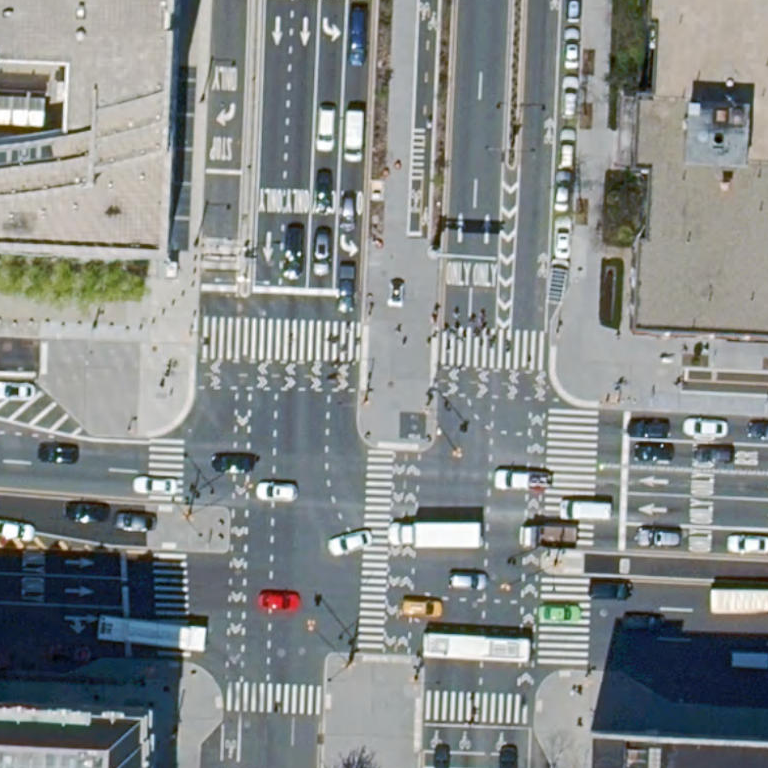

In [91]:
merged = locations.merge(
    location_year_files,
    on = 'location_id'
)

Image.open(DATA_PATH / merged[(merged['location_id'] == 9046811) & (merged['year'] == '2006')]['imagery_path'].iloc[0])
Image.open(DATA_PATH / merged[(merged['location_id'] == 9046811) & (merged['year'] == '2018')]['imagery_path'].iloc[0])

In [ ]:
# def load__image_document_linker(location_id:int, n_options:int=3, n_correct:int=1):
#     lo

# def load__document_image_linker(document_id:int, n_options:int=3, n_correct:int=1):
#     """_summary_

#     Args:
#         document_id (int): _description_
#         n_options (int): How many possible answers to include. Defaults to 3.
#         n_correct (int): How many correct answers to include. Defaults to 1.
#     """
#     # Find document with id == `document_id`
    
#     # Find all locations connected to `document_id`:
#     related_locations = np.array()
#     if len(related_locations) == 0:
#         # if none exists, then what?
#         raise ValueError('No location found!')
#     else:
#         correct_options = related_locations.sample(n_correct)
        
#         possible_remaining_option = [loc for loc in all_locations if loc not in related_locations]
#         alternate_options = possible_remaining_option.sample(n_options - n_correct)

#         return (correct_options, alternate_options)


test_id1 = 41012
test_id2 = 48899


n_options=3
n_correct=1

locations2docids = locations.merge(
    location_to_document_collection,
    on='location_id'
).merge(
    document_collections,
    on='document_collection_id'
).merge(
    document_files,
    on='document_collection_id'
)
def load__image_document_linker(location_id:int, n_options:int=3, n_correct:int=1):
    if location_id not in locations['location_id'].values:
        raise ValueError(f'location_id: {location_id} not found in universe!')
    
    if location_id not in locations2docids['location_id'].values:
        raise ValueError(f'location_id: {location_id} has no associated documents!')
    
    subset_docs = locations2docids.set_index('location_id').loc[[location_id]].reset_index()[['document_collection_id', 'document_file_id', 'relative_path','location_id','distance']]
    subset_doc_ids = subset_docs['document_collection_id'].values

    correct_options = subset_docs.sort_values('distance')[['document_file_id', 'relative_path']].head(n_correct)

    possible_incorrect_options = document_files[~document_files['document_file_id'].isin(subset_doc_ids)].merge(
        document_collections,
        on = 'document_collection_id'
    ) 
    incorrect_options = possible_incorrect_options[['document_file_id','relative_path']].sample(n_options - n_correct)

    options=pd.concat({'incorrect': incorrect_options, 'correct': correct_options}).reset_index(names=['label','dropme']).drop('dropme',axis=1)
    options = options.sample(n_options)

    options.index = ['Image A', 'Image B', 'Image C']
    return options.i(options['label'] == 'correct')

    # return {
    #     'location_id': location_id,
    #     'labels': options[['document_file_id', 'label']].to_dict(orient='index'),
    #     'options': options[['relative_path']].to_dict(orient='index')
    # }

In [156]:
docs = []
for loc_id in locations2docids['location_id'].head(5):
    docs.append(load__image_document_linker(loc_id))

docs[0]

,label,document_file_id,relative_path
Image A,correct,351.0,raw/documents/252--Sunnyside & Sunnyside Garde...
Image B,NaN,NaN,NaN
Image C,NaN,NaN,NaN


In [ ]:
location_id

# Read back in results

In [ ]:
import json
change_identifier_top100_output = pd.read_json('../data_oai_files/query1_top1000_output-4o.csv',lines=True)

ID_COLS = ['location_id', 'year_start', 'year_end']
RESULTS_COLS = ['change_detected','confidence','features']
change_identifier_top100_output[ID_COLS] = change_identifier_top100_output['item_id'].str.split('-', expand=True)
change_identifier_top100_output['location_id'] = change_identifier_top100_output['location_id'].astype(int)

#validation_df = change_identifier_top100_output[['location_id', 'year_start', 'year_end']].copy()
#validation_df

change_identifier_top100_output[RESULTS_COLS] = change_identifier_top100_output['output_text'].apply(pd.Series)[['change_detected','confidence','features']]
validation_df = change_identifier_top100_output[ID_COLS + RESULTS_COLS]

(
    validation_df.merge(
        queries123_sample,
        left_on = ID_COLS, right_on=ID_COLS
    ).groupby('change_identifier_safety')['change_detected']
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={True: 'Change Detected', False: 'Change Not Detected'})
    .T
    .style
        .background_gradient(cmap='Greens')
        .format('{:.1%}')
)

change_identifier_safety,Change Between,Change Out of Range,No Change
change_detected,,,
Change Not Detected,3.2%,6.0%,3.4%
Change Detected,96.8%,94.0%,96.6%


In [ ]:
location_to_document_collection